# Functions utilized

In [31]:
def univariate(df, sample=500):
    import pandas as pd
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    import math

    df_results = pd.DataFrame(columns=['bin_groups', 'type', 'missing', 'unique', 'min',
                                       'median', 'max', 'mode', 'mean', 'std', 'skew'])

    for col in df:
        dtype = df[col].dtype
        missing = df[col].isna().sum()
        unique = df[col].nunique()
        try:
            mode = df[col].mode().iloc[0]
        except:
            mode = None

        if pd.api.types.is_numeric_dtype(df[col]):
            min_ = df[col].min()
            max_ = df[col].max()
            mean = df[col].mean()
            median = df[col].median()
            std = df[col].std()
            skew = df[col].skew()
            df_results.loc[col] = ['-', dtype, missing, unique, min_, median, max_, mode,
                                   round(mean, 2), round(std, 2), round(skew, 2)]
        else:
            try:
                flag = df[col].value_counts(normalize=True).lt(0.05).sum()
            except:
                flag = None
            df_results.loc[col] = [flag, dtype, missing, unique, '-', '-', '-', mode, '-', '-', '-']

    # Countplots: categorical or binary features
    countplots = df_results[(df_results['type'] == 'object') | (df_results['unique'] == 2)]

    # Histograms: numeric with more than 2 unique values
    histograms = df_results[
        (df_results['type'].isin(['float64', 'int64'])) &
        (df_results['unique'].astype(float) > 2)
    ]

    # Plot countplots
    n = countplots.shape[0]
    if n > 0:
        cols = 4
        rows = math.ceil(n / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
        ax = ax.flatten() if n > 1 else [ax]
        for i, col in enumerate(countplots.index):
            try:
                sns.countplot(data=df, x=col, color='g', ax=ax[i])
                ax[i].set_ylabel('')
                ax[i].tick_params(labelrotation=90, left=False)
                ax[i].xaxis.set_label_position('top')
                sns.despine(left=True, top=True, right=True)
            except Exception as e:
                print(f"[Countplot error] {col}: {e}")
                ax[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    # Plot histograms
    n = histograms.shape[0]
    if n > 0:
        cols = 4
        rows = math.ceil(n / cols)
        fig, ax = plt.subplots(rows, cols, figsize=(cols * 4, rows * 3))
        
        if isinstance(ax, (np.ndarray, list)):
            ax = ax.flatten() if hasattr(ax, 'flatten') else list(ax)
        else:
            ax = [ax]

        for i, col in enumerate(histograms.index):
            try:
                sns.histplot(data=df.sample(n=min(sample, len(df)), random_state=1), x=col, color='b', ax=ax[i], kde=True)
                ax[i].set_ylabel('')
                ax[i].tick_params(left=False)
                sns.despine(left=True, top=True, right=True)
            except Exception as e:
                print(f"[Histogram error] {col}: {e}")
                ax[i].set_visible(False)
        plt.tight_layout()
        plt.show()

    return df_results

In [32]:
import pandas as pd


def bin_categories(df: pd.DataFrame, colsToBin=[], cutoff=0.05, messages=True, replace_with='Other'):
    import pandas as pd

    # If no cols specified, apply to all columns
    if len(colsToBin) == 0: colsToBin = df.columns

    for col in colsToBin:
        if not pd.api.types.is_numeric_dtype(df[col]):
            if messages: print("Categorical")
            # Measure % of group values
            # Filter out all groups that represent counts that are < cutoff %
            # Change remaining group occurrences to replace_with var

            other_list = df[col].value_counts()[df[col].value_counts() / df.shape[0] < cutoff].index
            df.loc[df[col].isin(other_list), col] = replace_with

        else:
            if messages: print("Non-Categorical")

    return df

# General Data Understanding

In [33]:
import pandas as pd

# Set option to display all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_movies = pd.read_csv('movies_titles.csv')
df_users = pd.read_csv('movies_users.csv')
df_triple = pd.read_csv('movies_ratings.csv')

display(df_triple.head())
display(df_users.head())
display(df_movies.head())


,user_id,show_id,rating
0,1,s8381,4
1,1,s3466,5
2,1,s3181,4
3,1,s294,3
4,1,s7739,5


,user_id,name,phone,email,age,gender,Netflix,Amazon Prime,Disney+,Paramount+,Max,Hulu,Apple TV+,Peacock,city,state,zip
0,1,Stephen Peters,890.309.2971,esmith@hotmail.com,18,Male,0,0,0,1,0,1,1,0,New John,CT,53771
1,2,Vicki Thomas,399.837.0996,callahanmichael@gmail.com,51,Female,0,0,1,0,0,0,1,1,Lake Robert,TN,71689
2,3,Jesse Bright,(268)691-6431,acline@shelton.biz,30,Female,0,0,0,1,0,0,0,1,East Tinaside,ME,40660
3,4,Mark Hernandez,+1-473-252-5923x513,deborah33@yahoo.com,22,Male,0,1,1,0,1,0,1,1,Bowenchester,VA,17039
4,5,Cynthia Armstrong,001-015-883-2813x8196,amycastillo@larsen.com,40,Female,1,0,1,1,1,0,1,0,North Thomasland,GA,77006


,show_id,type,title,director,cast,country,release_year,rating,duration,description,genre,Action,Adventure,Anime Series International TV Shows,British TV Shows Docuseries International TV Shows,Children,Comedies,Comedies Dramas International Movies,Comedies International Movies,Comedies Romantic Movies,Crime TV Shows Docuseries,Documentaries,Documentaries International Movies,Docuseries,Dramas,Dramas International Movies,Dramas Romantic Movies,Family Movies,Fantasy,Horror Movies,International Movies Thrillers,International TV Shows Romantic TV Shows TV Dramas,Kids' TV,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,90 min,As her father nears the end of his life filmma...,Documentaries,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,South Africa,2021,TV-MA,2 Seasons,After crossing paths at a party a Cape Town te...,"Dramas, TV Dramas",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"Action, Adventure, TV Action",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,2 Seasons,In a city of coaching centers known to train I...,"Comedies, TV Comedies",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


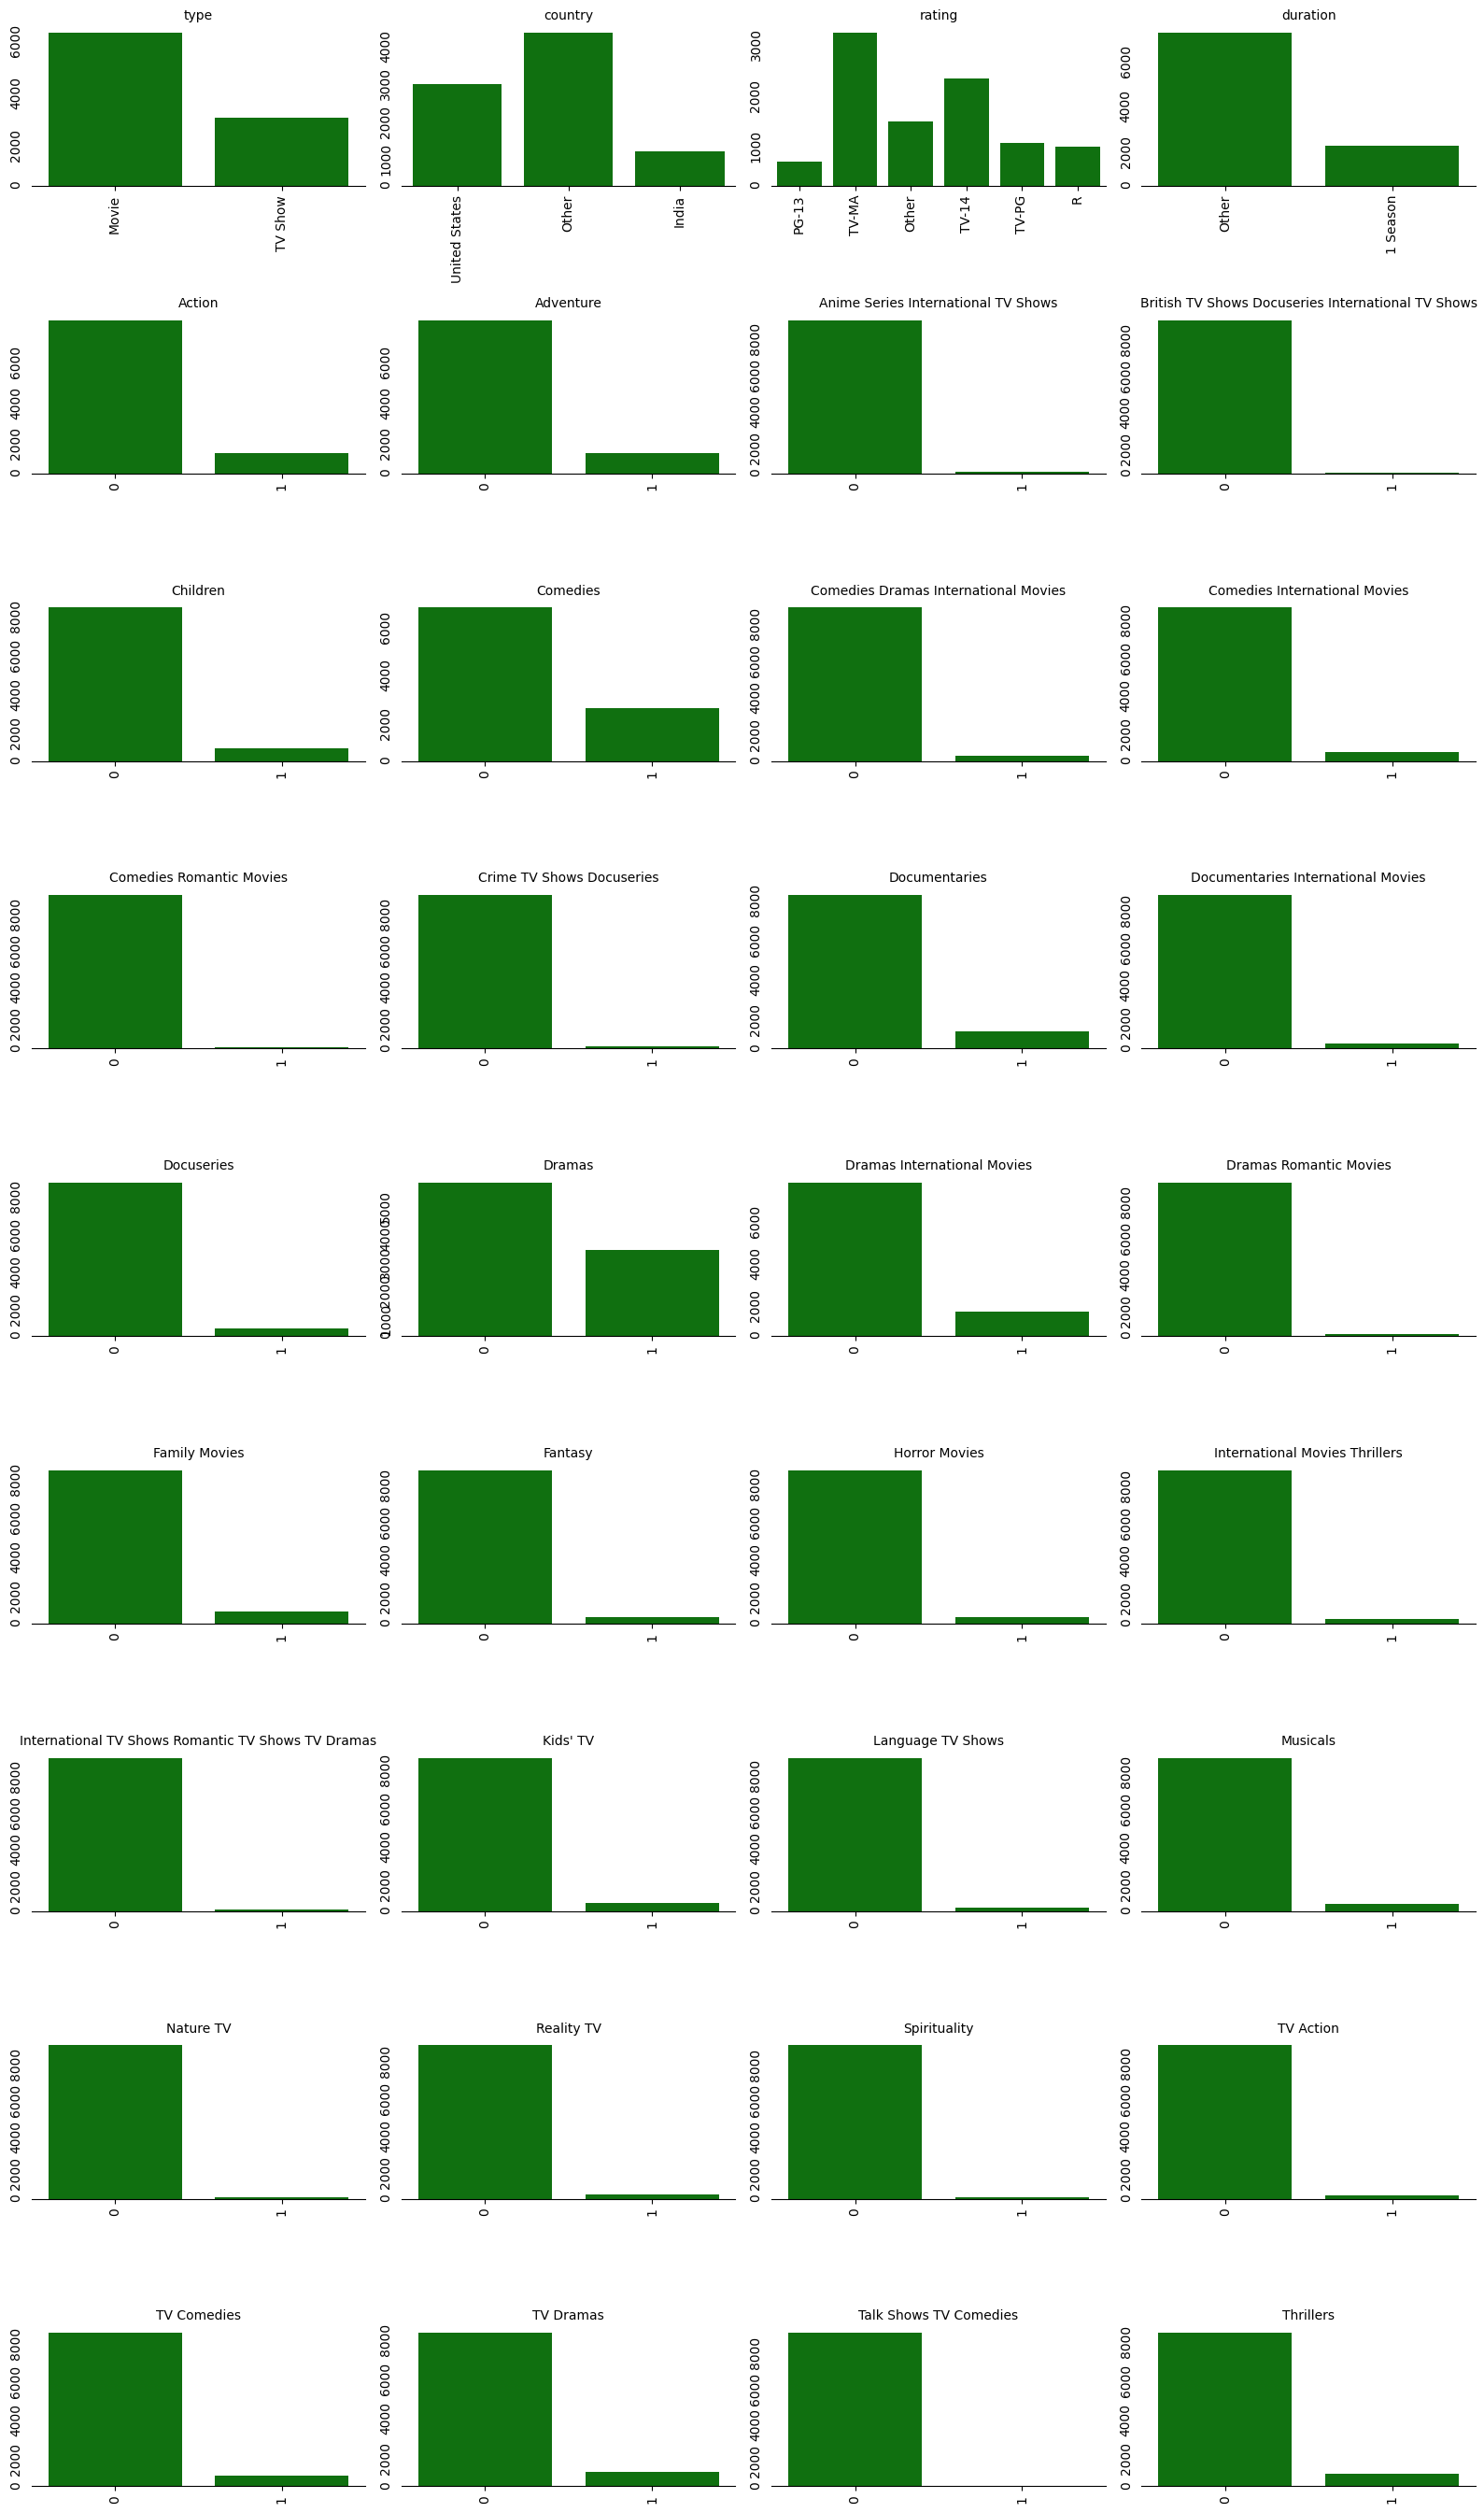

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
type,0,object,0,2,-,-,-,Movie,-,-,-
country,0,object,814,3,-,-,-,Other,-,-,-
release_year,-,int64,0,74,1925,2017.0,2021,2018,2014.19,8.84,-3.47
rating,0,object,4,6,-,-,-,TV-MA,-,-,-
duration,0,object,1,2,-,-,-,Other,-,-,-
Action,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Adventure,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Anime Series International TV Shows,-,int64,0,2,0,0.0,1,0,0.01,0.12,8.43
British TV Shows Docuseries International TV Shows,-,int64,0,2,0,0.0,1,0,0.0,0.06,17.04
Children,-,int64,0,2,0,0.0,1,0,0.07,0.26,3.23


In [34]:
bin_categories(df_movies, messages=False, colsToBin=['type','country','release_year','rating','duration'])
univariate(df_movies.drop(columns=['genre','show_id', 'title','director','cast','description']))

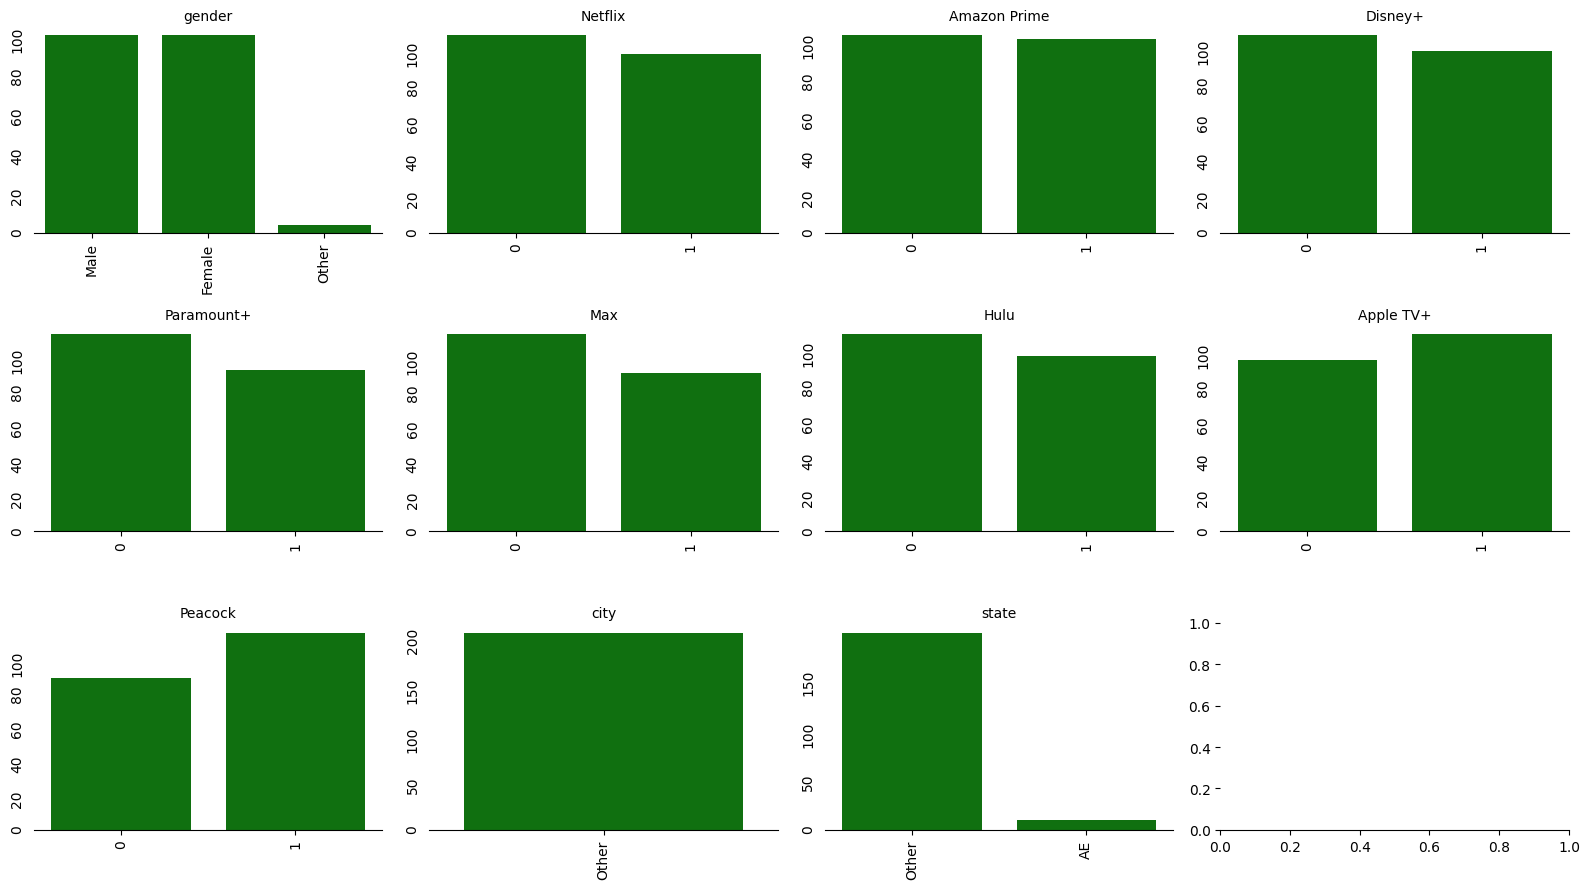

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
user_id,-,int64,0,200,1,100.5,200,1,100.5,57.88,0.0
age,-,int64,0,47,18,42.0,65,30,41.61,13.54,-0.03
gender,1,object,0,3,-,-,-,Female,-,-,-
Netflix,-,int64,0,2,0,0.0,1,0,0.48,0.5,0.1
Amazon Prime,-,int64,0,2,0,0.0,1,0,0.5,0.5,0.02
Disney+,-,int64,0,2,0,0.0,1,0,0.48,0.5,0.08
Paramount+,-,int64,0,2,0,0.0,1,0,0.45,0.5,0.2
Max,-,int64,0,2,0,0.0,1,0,0.44,0.5,0.22
Hulu,-,int64,0,2,0,0.0,1,0,0.47,0.5,0.12
Apple TV+,-,int64,0,2,0,1.0,1,1,0.54,0.5,-0.14


In [35]:
bin_categories(df_users, messages=False)
univariate(df_users.drop(columns=['name','phone','email']))

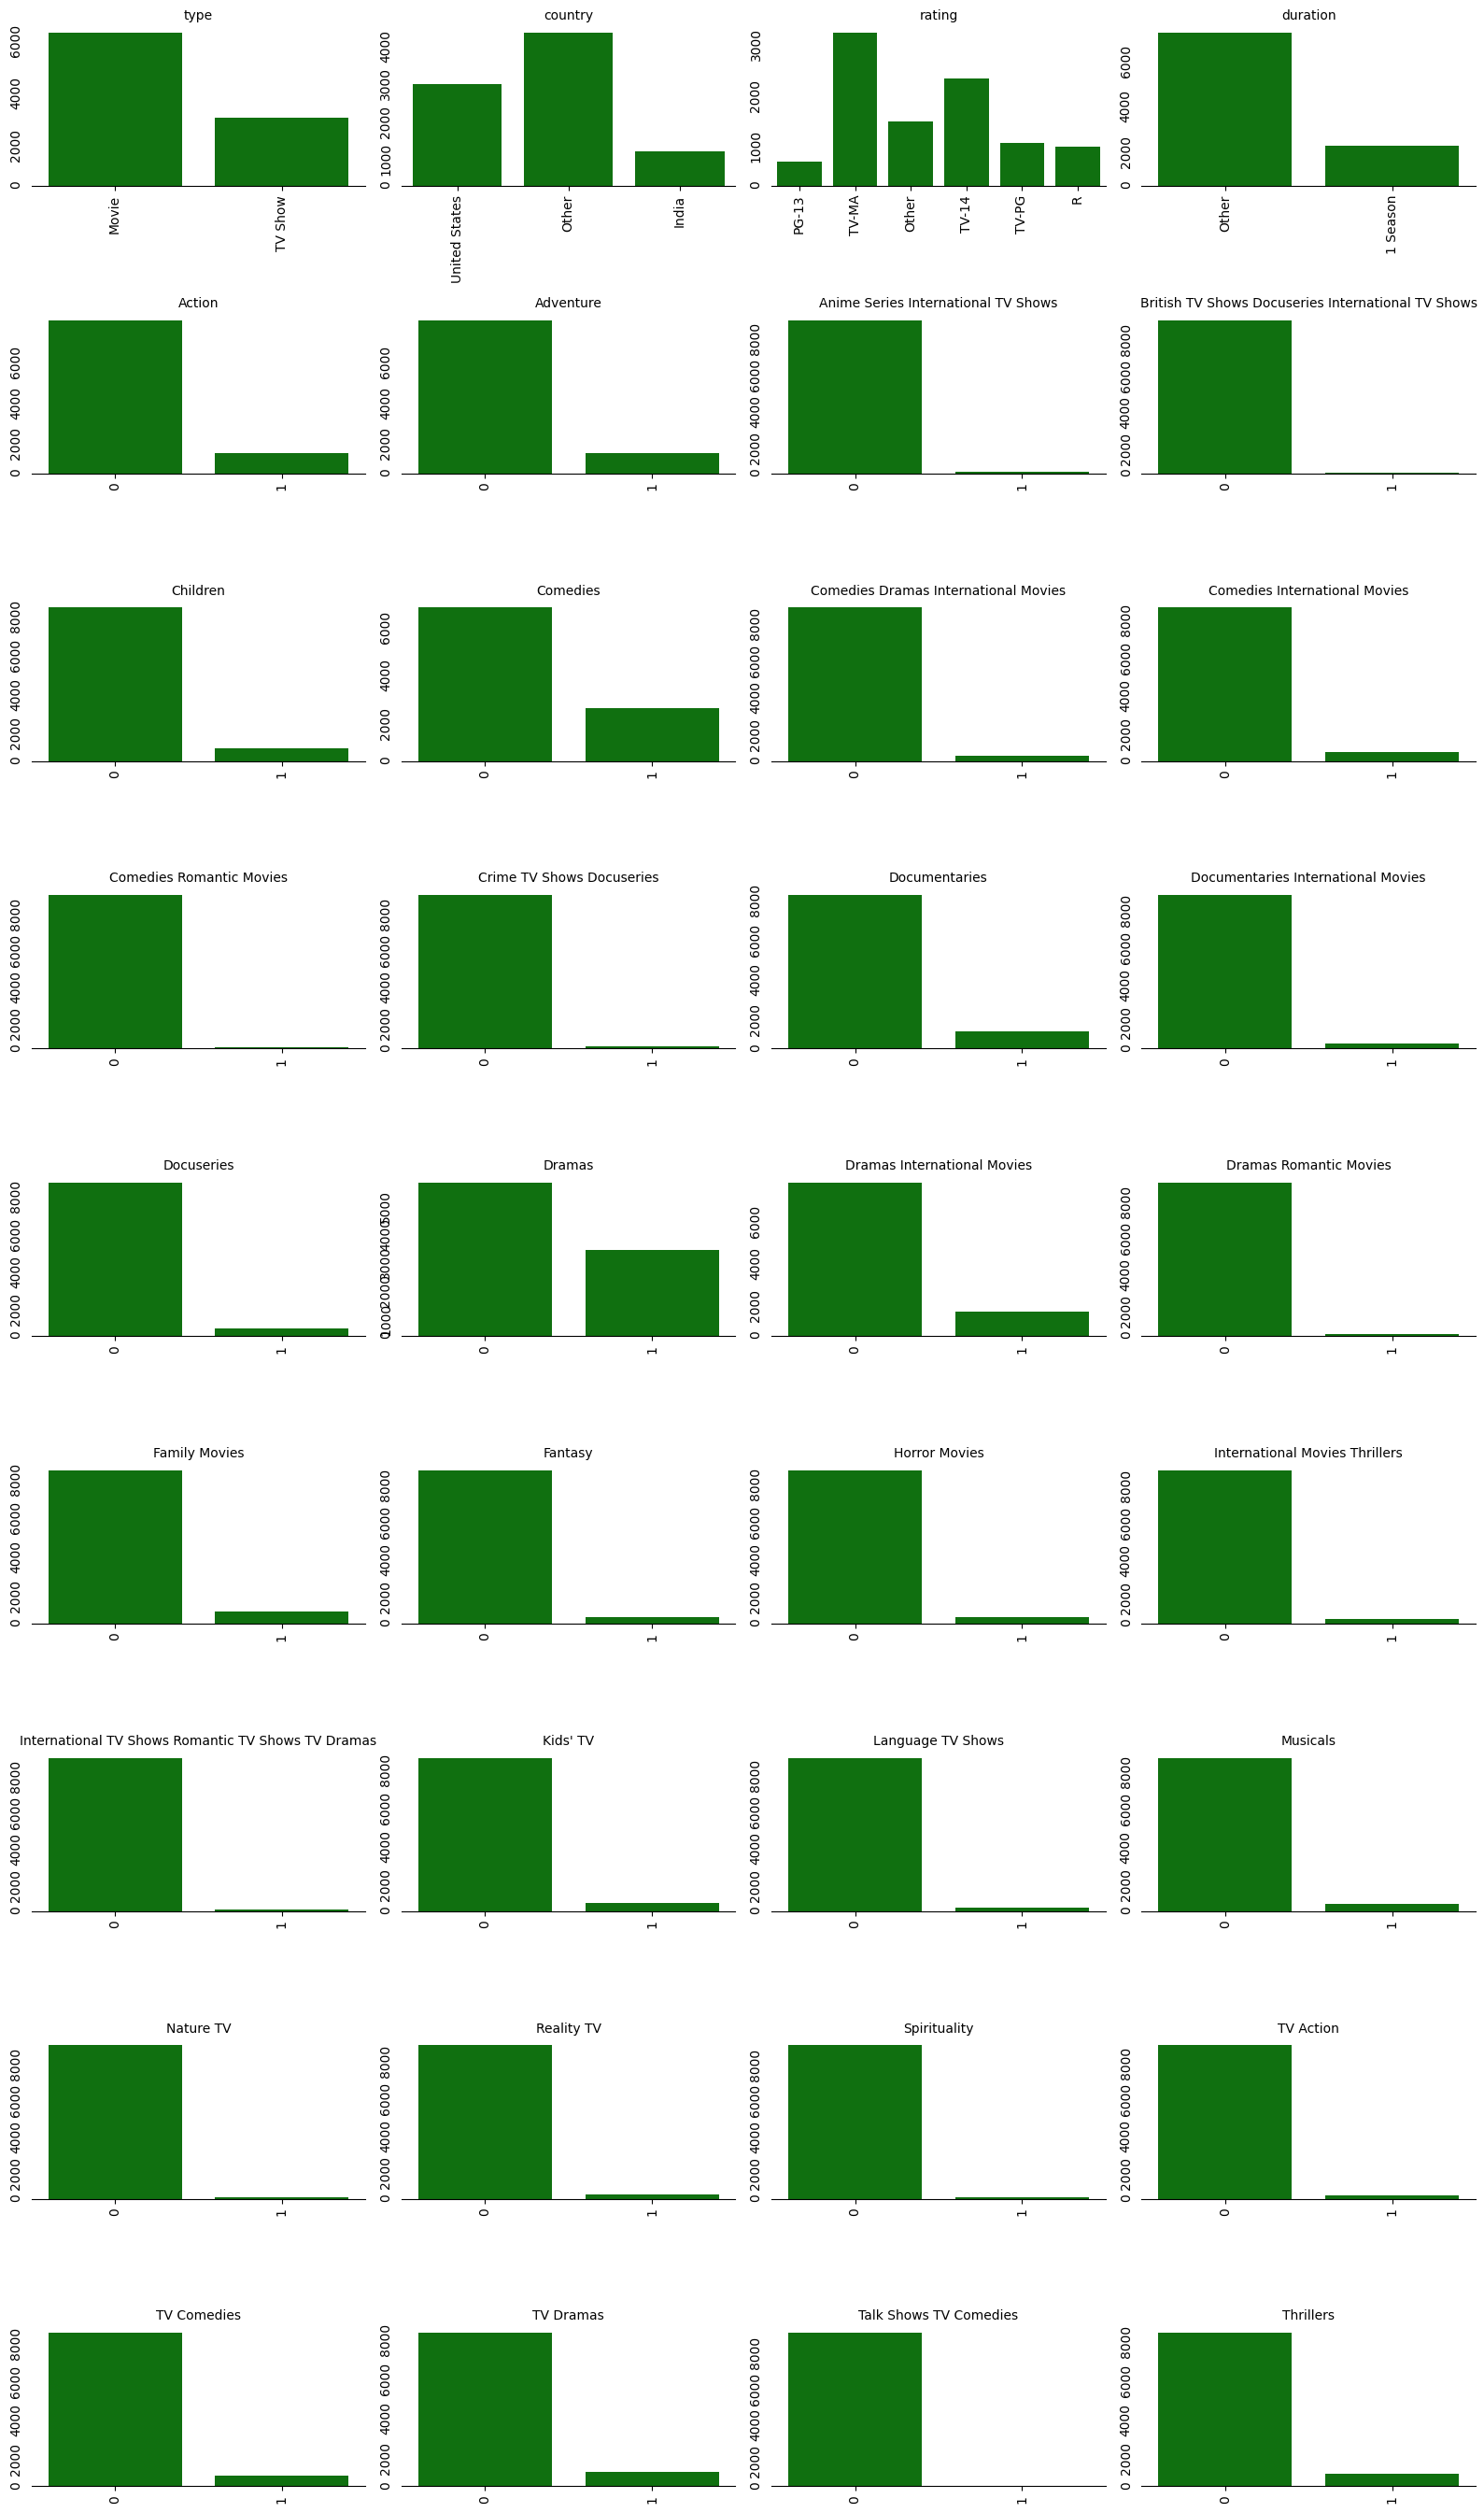

,bin_groups,type,missing,unique,min,median,max,mode,mean,std,skew
type,0,object,0,2,-,-,-,Movie,-,-,-
country,0,object,814,3,-,-,-,Other,-,-,-
release_year,-,int64,0,74,1925,2017.0,2021,2018,2014.19,8.84,-3.47
rating,0,object,4,6,-,-,-,TV-MA,-,-,-
duration,0,object,1,2,-,-,-,Other,-,-,-
Action,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Adventure,-,int64,0,2,0,0.0,1,0,0.12,0.32,2.35
Anime Series International TV Shows,-,int64,0,2,0,0.0,1,0,0.01,0.12,8.43
British TV Shows Docuseries International TV Shows,-,int64,0,2,0,0.0,1,0,0.0,0.06,17.04
Children,-,int64,0,2,0,0.0,1,0,0.07,0.26,3.23


In [36]:
def missing_drop(df, label, row_thresh=0.7, col_thresh=0.9, drop_all=False):
  # Drop any row that has a missing label
  df.dropna(axis='rows', subset=[label], inplace=True)

  # Drop rows and columns have are 100% missing
  df.dropna(axis='columns', thresh=1, inplace=True)
  df.dropna(axis='rows', thresh=1, inplace=True)

  # Drop rows and columns that are below the thresholds
  df.dropna(axis='columns', thresh=round(df.shape[0] * row_thresh), inplace=True)
  df.dropna(axis='rows', thresh=round(df.shape[1] * col_thresh), inplace=True)

  # If you don't want to leave anything behind to impute:
  if drop_all:
    df.dropna(axis='rows', inplace=True)

  return df

missing_drop(df=df_movies, label='title')

univariate(df_movies.drop(columns=['genre', 'show_id', 'title','director','cast','description']))

# Modeling

## Generic Collaborative Filtering Model


In [37]:
df_triple.sort_values(by=['user_id','show_id','rating'], inplace=True)
df_triple.head()

,user_id,show_id,rating
7,1,s2361,3
10,1,s242,3
5,1,s2917,3
3,1,s294,3
2,1,s3181,4


In [38]:
from sqlalchemy import create_engine
import pandas as pd

# Define your Azure SQL connection details
server = '1-10intex.database.windows.net'
database = 'Movies'
username = 'pigadmin'
password = 'Superduperstrongpassword!'
driver = 'ODBC Driver 18 for SQL Server'  # Or other valid installed driver

# Encode the driver string for URL
driver_encoded = driver.replace(' ', '+')


# Create the connection URL
connection_string = f'mssql+pyodbc://{username}:{password}@{server}:1433/{database}?driver={driver_encoded}&Encrypt=yes&TrustServerCertificate=no&Connection Timeout=30'

# Create SQLAlchemy engine
engine = create_engine(connection_string)

query = "SELECT * FROM movies_ratings"
df_triple_db = pd.read_sql(query, engine)
df_triple_db.head()

df_triple = df_triple_db

### Data Understanding

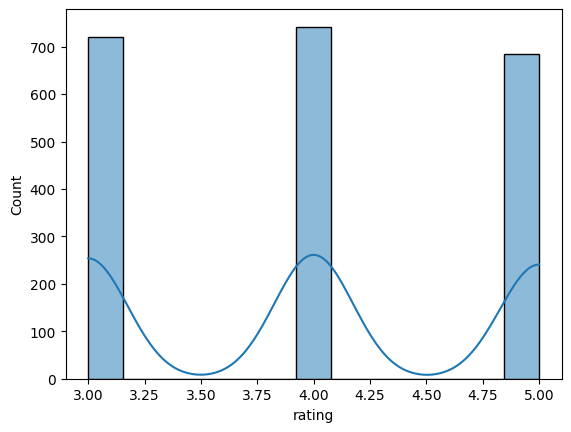

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_triple, x='rating', kde=True);

In [40]:
n_ratings = len(df_triple)
n_movies = len(df_triple['show_id'].unique())
n_users = len(df_triple['user_id'].unique())

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")
print(f"Average ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average ratings per movie: {round(n_ratings/n_movies, 2)}")

Number of ratings: 2147
Number of unique movieId's: 1809
Number of unique users: 200
Average ratings per user: 10.73
Average ratings per movie: 1.19


In [41]:
df_triple['show_id'].value_counts()

show_id
s7748    4
s6508    4
s8804    4
s540     4
s3282    4
s2179    4
s5113    3
s2418    3
s8175    3
s8575    3
s6162    3
s2932    3
s2568    3
s188     3
s4901    3
s2087    3
s8545    3
s3841    3
s5357    3
s856     3
s1979    3
s8276    3
s8750    3
s640     3
s6865    3
s1515    3
s3852    3
s322     3
s3608    3
s3371    3
s7647    3
s1041    3
s8636    3
s3921    3
s1818    3
s5438    3
s6510    3
s775     2
s7588    2
s5100    2
s6755    2
s4031    2
s7506    2
s3605    2
s18      2
s4277    2
s2768    2
s3996    2
s327     2
s4622    2
s2378    2
s7531    2
s1211    2
s4030    2
s7941    2
s1982    2
s1366    2
s2800    2
s6614    2
s6254    2
s246     2
s3867    2
s2383    2
s2985    2
s6050    2
s4634    2
s3380    2
s7303    2
s4512    2
s268     2
s5752    2
s2465    2
s7121    2
s3893    2
s6103    2
s2166    2
s2123    2
s5035    2
s3765    2
s5245    2
s26      2
s2254    2
s3742    2
s887     2
s401     2
s3051    2
s849     2
s1896    2
s2692    2
s167     2
s4

In [42]:
print('Min:\t\t', df_triple['show_id'].value_counts().min())
print('Quartile 1:\t', df_triple['show_id'].value_counts().quantile(.25))
print('Median:\t\t', df_triple['show_id'].value_counts().quantile(.5))
print('Quartile 3:\t', df_triple['show_id'].value_counts().quantile(.75))
print('Max:\t\t', df_triple['show_id'].value_counts().max())

Min:		 1
Quartile 1:	 1.0
Median:		 1.0
Quartile 3:	 1.0
Max:		 4


### Data Prep


In [43]:
# Store the count of ratings for each movie
value_counts = df_triple['show_id'].value_counts()

# Make a list of those with 2 or more ratings
# Over 75% of the movies have only 1 rating
keep_list = value_counts[value_counts >= 2]
print(len(keep_list), 'movies with 2 or more ratings\n')
keep_list

295 movies with 2 or more ratings



show_id
s7748    4
s6508    4
s8804    4
s540     4
s3282    4
s2179    4
s5113    3
s2418    3
s8175    3
s8575    3
s6162    3
s2932    3
s2568    3
s188     3
s4901    3
s2087    3
s8545    3
s3841    3
s5357    3
s856     3
s1979    3
s8276    3
s8750    3
s640     3
s6865    3
s1515    3
s3852    3
s322     3
s3608    3
s3371    3
s7647    3
s1041    3
s8636    3
s3921    3
s1818    3
s5438    3
s6510    3
s775     2
s7588    2
s5100    2
s6755    2
s4031    2
s7506    2
s3605    2
s18      2
s4277    2
s2768    2
s3996    2
s327     2
s4622    2
s2378    2
s7531    2
s1211    2
s4030    2
s7941    2
s1982    2
s1366    2
s2800    2
s6614    2
s6254    2
s246     2
s3867    2
s2383    2
s2985    2
s6050    2
s4634    2
s3380    2
s7303    2
s4512    2
s268     2
s5752    2
s2465    2
s7121    2
s3893    2
s6103    2
s2166    2
s2123    2
s5035    2
s3765    2
s5245    2
s26      2
s2254    2
s3742    2
s887     2
s401     2
s3051    2
s849     2
s1896    2
s2692    2
s167     2
s4

In [44]:
print(df_triple.shape)
df_triple = df_triple.loc[df_triple['show_id'].isin(keep_list.index)]
print(df_triple.shape)
print("Ratings per movie:\t", df_triple.shape[0]/len(keep_list))

(2147, 3)
(633, 3)
Ratings per movie:	 2.145762711864407


In [45]:
duplicate_ratings = df_triple.duplicated(subset=['user_id', 'show_id']).sum()
print(f"Duplicate ratings: {duplicate_ratings}")

if duplicate_ratings > 0:
    print(f'Total rows before dropping duplicates: {df_triple.shape[0]}')

    # keep='last' if you want to keep the last record
    # keep=False if you want to drop all duplicates
    df_triple.drop_duplicates(subset=['user_id', 'show_id'], keep='first', inplace=True)

    # These print statements are just a 'sanity check' to make sure we truly didn't have duplicates
    print(f'Total rows after dropping duplicates: {df_triple.shape[0]}')

Duplicate ratings: 0


,user_id,show_id,rating
6,1,s5899,5
11,2,s2471,4
12,2,s764,3
17,2,s540,3
21,2,s3882,3


,show_id,type,title,director,cast,country,release_year,rating,duration,description,genre,Action,Adventure,Anime Series International TV Shows,British TV Shows Docuseries International TV Shows,Children,Comedies,Comedies Dramas International Movies,Comedies International Movies,Comedies Romantic Movies,Crime TV Shows Docuseries,Documentaries,Documentaries International Movies,Docuseries,Dramas,Dramas International Movies,Dramas Romantic Movies,Family Movies,Fantasy,Horror Movies,International Movies Thrillers,International TV Shows Romantic TV Shows TV Dramas,Kids' TV,Language TV Shows,Musicals,Nature TV,Reality TV,Spirituality,TV Action,TV Comedies,TV Dramas,Talk Shows TV Comedies,Thrillers
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Michael Hilow, Ana Hoffman, Dick Johnson, Kirs...",United States,2020,PG-13,Other,As her father nears the end of his life filmma...,Documentaries,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,s2,TV Show,Blood & Water,NaN,Ama Qamata Khosi Ngema Gail Mabalane Thabang M...,Other,2021,TV-MA,Other,After crossing paths at a party a Cape Town te...,"Dramas, TV Dramas",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,s3,TV Show,Ganglands,Julien Leclercq,Sami Bouajila Tracy Gotoas Samuel Jouy Nabiha ...,NaN,2021,TV-MA,1 Season,To protect his family from a powerful drug lor...,"Action, Adventure, TV Action",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021,TV-MA,1 Season,Feuds flirtations and toilet talk go down amon...,"Docuseries, Reality TV",0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,s5,TV Show,Kota Factory,NaN,Mayur More Jitendra Kumar Ranjan Raj Alam Khan...,India,2021,TV-MA,Other,In a city of coaching centers known to train I...,"Comedies, TV Comedies",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


         ratings_count  ratings_mean
show_id                             
s1037                2      3.000000
s1041                3      4.666667
s1060                2      4.500000
s1080                2      4.000000
s1083                2      3.500000
s1119                2      4.500000
s1128                2      4.000000
s119                 2      3.500000
s1195                2      3.500000
s1207                2      4.000000
s1211                2      3.500000
s1276                2      4.000000
s1335                2      4.500000
s1366                2      3.500000
s1433                2      4.000000
s1463                2      4.500000
s1466                2      4.500000
s1515                3      4.000000
s155                 2      5.000000
s1580                2      4.000000
s1629                2      3.500000
s1635                2      4.500000
s167                 2      4.000000
s1753                2      4.000000
s1795                2      4.500000
s

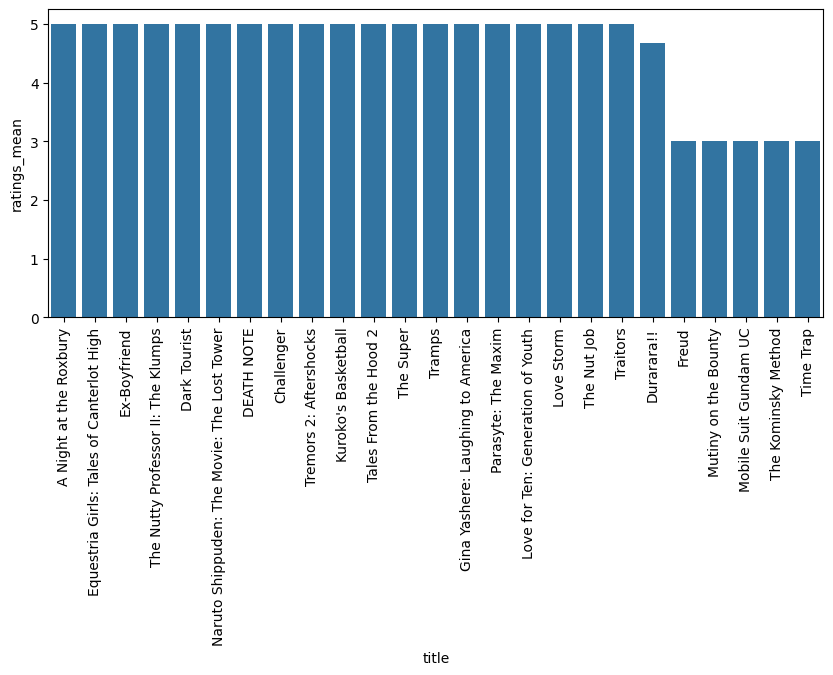

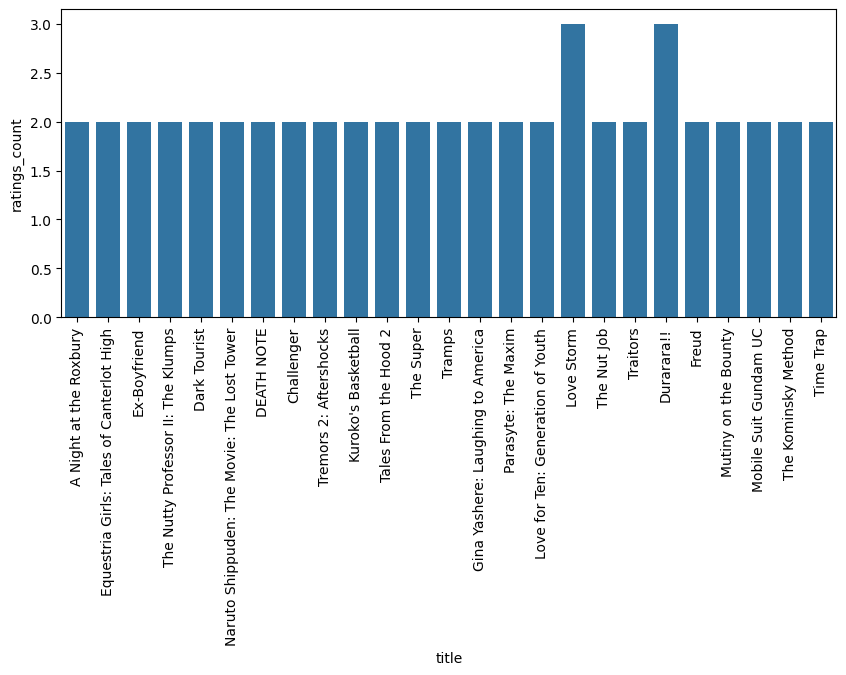

In [46]:
display(df_triple.head())
display(df_movies.head())

# Group the rows into individual titles and calculate the mean rating for each row
movie_stats = df_triple.groupby(by=['show_id'])[['rating']].agg(['count', 'mean'])
movie_stats.columns = ['ratings_count', 'ratings_mean'] # Rename the columns to simplify the index

# Join with df_movies to get the titles
print(movie_stats)
df_movies_indexed = df_movies.set_index('show_id')
movie_stats = movie_stats.join(df_movies_indexed['title'])

# Sort the ratings
movie_stats = movie_stats.sort_values(by=['ratings_mean'], ascending=False)

# Create a smaller dataset of the top n and bottom n rated movies
df_reduced = pd.concat([movie_stats.head(20), movie_stats.tail(5)])

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_mean')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,4)) # Set the size of the figure
sns.barplot(data=df_reduced, x='title', y='ratings_count')
plt.xticks(rotation=90)
plt.show()

### Modeling Prep

In [47]:
import numpy as np
from scipy.sparse import csr_matrix

U = df_triple['user_id'].nunique()   # Number of users for the matrix
I = df_triple['show_id'].nunique()  # Number of items for the matrix

# Map user and movie IDs to matrix indices
user_mapper = dict(zip(np.unique(df_triple['user_id']), list(range(U))))
item_mapper = dict(zip(np.unique(df_triple['show_id']), list(range(I))))

# Map maxtrix indices back to IDs
user_inv_mapper = dict(zip(list(range(U)), np.unique(df_triple['user_id'])))
item_inv_mapper = dict(zip(list(range(I)), np.unique(df_triple['show_id'])))

# Create a list of index values for the csr_matrix for users and movies
user_index = [user_mapper[i] for i in df_triple['user_id']]
item_index = [item_mapper[i] for i in df_triple['show_id']]

# Build the final matrix which will look like: (movieId, userId) rating
X = csr_matrix((df_triple['rating'], (item_index, user_index)), shape=(I, U))

# Print each item out to see how they all work together.
# Each object is used to create the next object.
# We don't have to print these out; this is just to help you understand.
print(f'Number of users: {U}')
print(f'Number of items: {I}')
print(f'user_mapper:\t {len(user_mapper.keys())}   keys:values {user_mapper}')
print(f'item_mapper:\t {len(item_mapper.keys())}  keys:values {item_mapper}')
print(f'user_index:\t {len(user_index)} values\t   {user_index}')
print(f'item_index:\t {len(item_index)} values\t   {item_index}')
print(f'user_inv_mapper: {len(user_inv_mapper.keys())}   keys:values {user_inv_mapper}')
print(f'item_inv_mapper: {len(item_inv_mapper.keys())}  keys:values {item_inv_mapper}')
print(f'X: {X}')

Number of users: 191
Number of items: 295
user_mapper:	 191   keys:values {np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(8): 6, np.int64(9): 7, np.int64(11): 8, np.int64(12): 9, np.int64(13): 10, np.int64(14): 11, np.int64(15): 12, np.int64(16): 13, np.int64(17): 14, np.int64(18): 15, np.int64(19): 16, np.int64(20): 17, np.int64(21): 18, np.int64(22): 19, np.int64(23): 20, np.int64(24): 21, np.int64(25): 22, np.int64(26): 23, np.int64(28): 24, np.int64(29): 25, np.int64(30): 26, np.int64(31): 27, np.int64(32): 28, np.int64(33): 29, np.int64(34): 30, np.int64(35): 31, np.int64(36): 32, np.int64(37): 33, np.int64(39): 34, np.int64(40): 35, np.int64(41): 36, np.int64(42): 37, np.int64(43): 38, np.int64(44): 39, np.int64(45): 40, np.int64(46): 41, np.int64(47): 42, np.int64(48): 43, np.int64(49): 44, np.int64(50): 45, np.int64(51): 46, np.int64(52): 47, np.int64(53): 48, np.int64(54): 49, np.int64(55): 50, np.int64(56): 51, np.int6

In [48]:
def create_matrix(df, user, item, rating):
    import numpy as np
    from scipy.sparse import csr_matrix

    U = df[user].nunique()  # Number of users for the matrix
    I = df[item].nunique()  # Number of items for the matrix

    # Map user and movie IDs to matrix indices
    user_mapper = dict(zip(np.unique(df[user]), list(range(U))))
    item_mapper = dict(zip(np.unique(df[item]), list(range(I))))

    # Map matrix indices back to IDs
    user_inv_mapper = dict(zip(list(range(U)), np.unique(df[user])))
    item_inv_mapper = dict(zip(list(range(I)), np.unique(df[item])))

    # Create a list of index values for the csr_matrix for users and movies
    user_index = [user_mapper[i] for i in df[user]]
    item_index = [item_mapper[i] for i in df[item]]

    # Build the final matrix which will look like: (movieId, userId) rating
    X = csr_matrix((df[rating], (item_index, user_index)), shape=(I, U))

    return X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper

In [49]:
X, user_mapper, item_mapper, user_inv_mapper, item_inv_mapper = create_matrix(df_triple, 'user_id', 'show_id', 'rating')

print(X) # (movieId, userId)   rating
print(user_mapper)
print(user_inv_mapper)
print(item_mapper)
print(item_inv_mapper)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 633 stored elements and shape (295, 191)>
  Coords	Values
  (0, 46)	3
  (0, 117)	3
  (1, 17)	5
  (1, 72)	5
  (1, 130)	4
  (2, 4)	5
  (2, 152)	4
  (3, 134)	4
  (3, 184)	4
  (4, 49)	3
  (4, 50)	4
  (5, 93)	5
  (5, 178)	4
  (6, 42)	3
  (6, 155)	5
  (7, 83)	4
  (7, 105)	3
  (8, 10)	4
  (8, 85)	3
  (9, 40)	4
  (9, 114)	4
  (10, 120)	3
  (10, 156)	4
  (11, 10)	5
  (11, 128)	3
  :	:
  (284, 63)	3
  (284, 121)	3
  (285, 105)	3
  (285, 171)	5
  (286, 5)	4
  (286, 19)	4
  (287, 189)	5
  (287, 190)	3
  (288, 39)	4
  (288, 104)	5
  (288, 114)	4
  (289, 107)	5
  (289, 139)	4
  (290, 146)	4
  (290, 181)	4
  (291, 15)	3
  (291, 47)	5
  (292, 86)	4
  (292, 99)	3
  (292, 132)	5
  (292, 141)	5
  (293, 108)	4
  (293, 182)	5
  (294, 43)	4
  (294, 157)	3
{np.int64(1): 0, np.int64(2): 1, np.int64(3): 2, np.int64(4): 3, np.int64(5): 4, np.int64(6): 5, np.int64(8): 6, np.int64(9): 7, np.int64(11): 8, np.int64(12): 9, np.int64(13): 10, np.int64(14): 1

### Model Fitting

In [50]:
def recommend(itemId, X, item_mapper, item_inv_mapper, k, metric='cosine', messages=True):
    from sklearn.neighbors import NearestNeighbors
    
    rec_ids = []                # Make a list for the recommended item IDs we'll get later
    item = item_mapper[itemId]  # Get the index of the movie ID passed into the function
    item_vector = X[item]       # Get the vector of user ratings for the movie ID passed into the function
    
    # Fit the clustering algorithm based on the user-item matrix X
    knn = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric).fit(X)
    
    # Call the trained knn cluster model to return the nearest neighbors of the item_vector passed in
    rec = knn.kneighbors(item_vector.reshape(1,-1), return_distance=True)
    rec_indeces = rec[1][0]     # Parse out the list of indeces of the recommended items
    rec_distances = rec[0][0]   # Parse out the recommendation strength calculated as the distance from the cluster center
    rec_distances = np.delete(rec_distances, 0) # Drop the first number in the list because it is the distance of itemId from itself
    
    # We need to replace the recommended item indeces with their original item IDs
    for i in range(1, knn.n_neighbors): # n_neighbors is the number of neighbors to return
        rec_ids.append(item_inv_mapper[rec_indeces[i]])
        
    # It may help to see what this is. The distance list is first and the recommended item indeces are second
    if messages:
        print(f'List of recommended item indeces:\n{rec_indeces}\n')
        print(f'List of recommended item IDs:\n{rec_ids}\n')
        print(f'List of recommended item similarity to selected item:\n{rec_distances}\n')
    
    # Return two lists: the original item IDs of the recommendations and their similarity scores
    return rec_ids, rec_distances

In [51]:
movie_id = 's1037'
similar_ids = recommend(movie_id, X, item_mapper, item_inv_mapper, k=10)

movie_title = df_movies.loc[df_movies['show_id'] == movie_id, 'title'].values[0]
print(f"If you like {movie_title}, you may also enjoy:\n")

for i in similar_ids[0]:
    i_str = str(i)  # Make sure it's a string like 's1037'
    title_match = df_movies.loc[df_movies['show_id'] == i_str, 'title']
    if not title_match.empty:
        title = title_match.values[0]
        print(f"\t{title}")
    else:
        print(f"\t[Title not found for show_id: {i_str}]")

List of recommended item indeces:
[  0 134  24 280  37 196 194 199 198 197 201]

List of recommended item IDs:
['s4204', 's1795', 's856', 's1979', 's5803', 's5752', 's5999', 's5899', 's5889', 's6050']

List of recommended item similarity to selected item:
[0.43431458 0.44784237 0.53971269 0.62536568 1.         1.
 1.         1.         1.         1.        ]

If you like Time Trap, you may also enjoy:

	ReMastered: Massacre at the Stadium
	The Devil Punisher
	Jurassic World Camp Cretaceous
	Ratched
	Dead Set
	DEATH NOTE
	2036 Origin Unknown
	6 Years
	Hemlock Grove
	A Night at the Roxbury


In [52]:
user_id = 150   # Select a user
k = 20          # Select the number of recommendations to give them; movies they've seen will be removed from this total

# Filter the data by only those movies rated by this user
df_user_ratings = df_triple[df_triple['user_id']==user_id]

# Find the movies with the max ratings for this user
max_rating = df_user_ratings['rating'].max()
df_favorites = df_user_ratings[df_user_ratings['rating'] == max_rating]['show_id']

# Randomly select one of their top rated movies
movie_id = df_favorites.sample(n=1).iloc[0]

# Get a list of recommendations based on their top rated movie
rec_ids, rec_distances = recommend(movie_id, X, item_mapper=item_mapper, item_inv_mapper=item_inv_mapper, 
                                    k=k, messages=False)

movie_title = df_movies.loc[df_movies['show_id'] == movie_id, 'title'].values[0]
print(f"If you like {movie_title}, you may also enjoy:\n")
for i in rec_ids:
    if not i in list(df_user_ratings['show_id']): # Make sure we don't recommend movies they have already seen
        title_match = df_movies.loc[df_movies['show_id'] == i, 'title']
        if not title_match.empty:
            print(f"\t{title_match.values[0]}")
        else:
            print(f"\t[Title not found for show_id: {i}]")

If you like Zombie Dumb, you may also enjoy:

	Hemlock Grove
	Accidentally in Love
	Gameboys Level-Up Edition
	Love for Ten: Generation of Youth
	Inuyasha the Movie - La spada del dominatore del mondo
	Kuroko's Basketball
	Sirius the Jaeger
	Erased
	Be with Me
	Naruto Shippuden the Movie: Blood Prison
	Dino Hunt
	6 Years
	Doomsday Preppers
	Dead Set
	A Haunting at Silver Falls: The Return
	DEATH NOTE
	Bee Movie
	Immortal Classic
